In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

sm = pd.read_csv('stud_math.csv')

In [119]:
display(sm.head(5))
sm.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Тут мы видим, что всего в трех столбцах заполнены все значения, с остальными надо бы что-то сделать, как минимум, заполнить пропуски.

# school

In [120]:
pd.DataFrame(sm.school.value_counts())

,school
GP,349
MS,46


Школы всего две. Пропусков в столбце нет. Переведу в числовые значения, чтобы посмотреть корреляцию с оценками и другими данными, влияет ли школа хоть на что-нибудь.

In [121]:
sm.school = sm.school.apply(lambda x: 1 if x == 'GP' else 2) #GP - 1, MS - 2

In [122]:
sm.corr()

,school,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
school,1.000000,0.377610,-0.133708,-0.060082,0.254034,-0.092700,0.059999,0.092700,-0.031147,0.035052,-0.006257,-0.037339,0.013642,-0.044524
age,0.377610,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.133708,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.060082,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.254034,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.092700,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.059999,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.092700,0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,-0.031147,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.035052,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026


Самая низкая корреляция со score из всех переменных. Первый кандидат на удаление. Допущу, что школой можно пренебречь и удалить из данных.

In [123]:
sm = sm.drop('school', 1) 

# age

In [124]:
pd.DataFrame(sm.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Подозреваю, что есть выбросы, проверю:

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


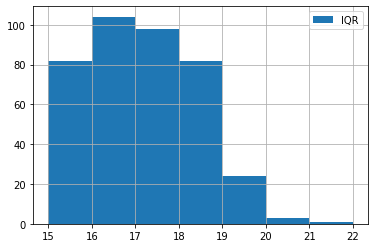

In [125]:
median = sm.age.median()
IQR = sm.age.quantile(0.75) - sm.age.quantile(0.25)
perc25 = sm.age.quantile(0.25)
perc75 = sm.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
sm.age.loc[sm.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 7, range = (15, 22), 
                                                                                             label = 'IQR')
plt.legend();

In [126]:
sm = sm.loc[sm.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

# sex

In [127]:
pd.DataFrame(sm.sex.value_counts())

,sex
F,208
M,186


Ну, тут пропусков нет, переведу в числовой формат и посмотрю корреляцию.

In [128]:
sm.sex = sm.sex.apply(lambda x: 1 if x == 'F' else 2) #F - 1, M - 2

In [129]:
sm.corr()

,sex,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
sex,1.000000,-0.040707,0.079878,-0.024499,0.050934,-0.305244,0.030489,0.305244,0.048287,0.231328,0.081720,0.143552,-0.039069,0.100916
age,-0.040707,1.000000,-0.167883,-0.133117,0.090864,-0.002354,0.195891,0.002354,0.057357,0.021067,0.119997,-0.047402,0.091656,-0.153518
Medu,0.079878,-0.167883,1.000000,0.276297,-0.173236,0.079484,-0.252250,-0.079484,-0.010786,0.024894,0.063415,-0.044241,-0.012162,0.213747
Fedu,-0.024499,-0.133117,0.276297,1.000000,0.029354,0.054913,-0.146394,-0.054913,0.043015,-0.065079,-0.019959,0.023714,0.005414,0.077578
traveltime,0.050934,0.090864,-0.173236,0.029354,1.000000,-0.104661,0.072760,0.104661,-0.014720,-0.020609,0.040810,-0.024855,-0.047621,-0.071610
studytime,-0.305244,-0.002354,0.079484,0.054913,-0.104661,1.000000,-0.170081,-1.000000,0.050025,-0.119743,-0.046045,-0.086577,-0.025392,0.114325
failures,0.030489,0.195891,-0.252250,-0.146394,0.072760,-0.170081,1.000000,0.170081,-0.035349,0.092434,0.106397,0.101967,0.054778,-0.345624
"studytime, granular",0.305244,0.002354,-0.079484,-0.054913,0.104661,-1.000000,0.170081,1.000000,-0.050025,0.119743,0.046045,0.086577,0.025392,-0.114325
famrel,0.048287,0.057357,-0.010786,0.043015,-0.014720,0.050025,-0.035349,-0.050025,1.000000,0.173749,0.076198,0.083891,-0.083941,0.058966
freetime,0.231328,0.021067,0.024894,-0.065079,-0.020609,-0.119743,0.092434,0.119743,0.173749,1.000000,0.294317,0.065776,0.008514,0.020147


Пока оставлю.

# address

In [130]:
pd.DataFrame(sm.address.value_counts())

,address
U,294
R,83


Тоже переведу в числовой формат, а также заменю пропуски на None:

In [131]:
sm.address = sm.address.apply(lambda x: 1 if x == 'U' else (2 if x == 'R' else x)) #Urban - 1, Rural - 2

In [132]:
sm.address = sm.address.apply(lambda x: None if x == '' else x)

In [133]:
display(pd.DataFrame(sm.address.value_counts()))
sm.loc[:, ['address']].info()

,address
1.0,294
2.0,83


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   address  377 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [134]:
sm.address.unique()

array([ 1., nan,  2.])

# famsize

In [135]:
pd.DataFrame(sm.famsize.value_counts())

,famsize
GT3,260
LE3,107


Переведу в числовой формат, чтобы было удобнее посмотреть корреляцию, и заменю пропуски на None:

In [136]:
sm.famsize = sm.famsize.apply(lambda x: 1 if x == 'LE3' else (2 if x == 'GT3' else x)) #LE3 (меньше или равно 3) - 1, GT3 (больше 3) - 2

In [137]:
sm.famsize = sm.famsize.apply(lambda x: None if x == '' else x)

# Pstatus

In [138]:
display(pd.DataFrame(sm.Pstatus.value_counts()))
sm.loc[:, ['Pstatus']].info()

,Pstatus
T,313
A,36


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  349 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [139]:
sm.Pstatus = sm.Pstatus.apply(lambda x: 1 if x == 'T' else (2 if x == 'A' else x)) #T (вместе) - 1, A (раздельно) - 2

Я не считаю, что можно заменить пропуски в Pstatus, основываясь на данных из famsize (хотя и видела такую рекомендацию в Слэке). Поэтому заменю пропуски на None.

In [140]:
sm.Pstatus = sm.Pstatus.apply(lambda x: None if x == '' else x)

# Medu

In [141]:
pd.DataFrame(sm.Medu.value_counts())
sm.loc[:, ['Medu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    391 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [142]:
sm.Medu = sm.Medu.apply(lambda x: None if x == '' else x)

# Fedu

In [143]:
pd.DataFrame(sm.Fedu.value_counts())
sm.loc[:, ['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    370 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [144]:
sm.Fedu = sm.Fedu.apply(lambda x: None if x == '' else x)

# Mjob

In [145]:
pd.DataFrame(sm.Mjob.value_counts())

,Mjob
other,133
services,97
at_home,58
teacher,55
health,32


In [146]:
sm.loc[:, ['Mjob']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    375 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [147]:
sm.Mjob = sm.Mjob.astype(str).apply(lambda x: None if x.strip() == '' else x)

# Fjob

In [148]:
pd.DataFrame(sm.Fjob.value_counts())

,Fjob
other,197
services,101
teacher,29
at_home,16
health,15


In [149]:
sm.Fjob = sm.Fjob.astype(str).apply(lambda x: None if x.strip() == '' else x)

# reason

In [150]:
pd.DataFrame(sm.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,33


Думаю, что в этом случае можно заполнить пропуски выриантом "Other". Не идеально, но допустимо, на мой взгляд, так как в обоих случаях мы не знаем причины.

In [151]:
sm.reason = sm.reason.apply(lambda x: 'other' if x == 'NaN' else x)

In [152]:
sm.reason.fillna('other',  inplace=True)

In [153]:
pd.DataFrame(sm.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,50


# guardian

In [155]:
sm.guardian.unique()

array(['mother', 'father', 'other', nan], dtype=object)

In [156]:
pd.DataFrame(sm.guardian.value_counts())

,guardian
mother,249
father,86
other,28


Здесь пропусков достаточно большое количество по сравнению с вариантом other, я бы не стала их заменять на этот вариант. Оставлю так.

# traveltime

In [158]:
pd.DataFrame(sm.traveltime.value_counts())

,traveltime
1.0,241
2.0,96
3.0,22
4.0,7


In [160]:
sm.traveltime = sm.traveltime.apply(lambda x: None if x == '' else x)

Не знаю, что с этим делать. Пока оставлю так.

# studytime

In [163]:
pd.DataFrame(sm.studytime.value_counts())

,studytime
2.0,194
1.0,102
3.0,64
4.0,27


In [164]:
sm.studytime = sm.studytime.apply(lambda x: None if x == '' else x)

# failures

In [165]:
pd.DataFrame(sm.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,14


In [166]:
sm.failures = sm.failures.apply(lambda x: None if x == '' else x)

# schoolsup

In [167]:
pd.DataFrame(sm.schoolsup.value_counts())

,schoolsup
no,334
yes,51


In [168]:
sm.schoolsup = sm.schoolsup.apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

In [169]:
sm.schoolsup = sm.schoolsup.apply(lambda x: None if x == '' else x)

# famsup

In [173]:
pd.DataFrame(sm.famsup.value_counts())

,famsup
yes,219
no,136


In [174]:
sm.famsup = sm.famsup.apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

In [175]:
sm.famsup = sm.famsup.apply(lambda x: None if x == '' else x)

# paid

In [176]:
pd.DataFrame(sm.paid.value_counts())

,paid
no,199
yes,155


In [177]:
sm.paid = sm.paid.apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

In [178]:
sm.paid = sm.paid.apply(lambda x: None if x == '' else x)

# activities

In [179]:
pd.DataFrame(sm.activities.value_counts())

,activities
yes,195
no,185


In [180]:
sm.activities = sm.activities.apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

In [181]:
sm.activities = sm.activities.apply(lambda x: None if x == '' else x)

# nursery

In [182]:
pd.DataFrame(sm.nursery.value_counts())

,nursery
yes,300
no,78


In [183]:
sm.nursery = sm.nursery.apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

In [184]:
sm.nursery = sm.nursery.apply(lambda x: None if x == '' else x)

# higher

In [185]:
pd.DataFrame(sm.higher.value_counts())

,higher
yes,356
no,18


In [186]:
sm.higher = sm.higher.apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

In [187]:
sm.higher = sm.higher.apply(lambda x: None if x == '' else x)

# internet

In [188]:
pd.DataFrame(sm.internet.value_counts())

,internet
yes,304
no,56


In [189]:
sm.internet = sm.internet.apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

In [190]:
sm.internet = sm.internet.apply(lambda x: None if x == '' else x)

# romantic

In [191]:
pd.DataFrame(sm.romantic.value_counts())

,romantic
no,240
yes,123


In [192]:
sm.romantic = sm.romantic.apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

In [193]:
sm.romantic = sm.romantic.apply(lambda x: None if x == '' else x)

# famrel

In [194]:
pd.DataFrame(sm.famrel.value_counts())

,famrel
4.0,182
5.0,98
3.0,62
2.0,17
1.0,7
-1.0,1


У нас в условиях значения могут быть от 1 до 5, удалю строку с ошибкой.

In [195]:
sm = sm.loc[sm.famrel.between(1,5)]

In [197]:
sm.famrel = sm.famrel.apply(lambda x: None if x == '' else x)

# freetime

In [196]:
pd.DataFrame(sm.freetime.value_counts())

,freetime
3.0,141
4.0,104
2.0,58
5.0,36
1.0,17


In [198]:
sm.freetime = sm.freetime.apply(lambda x: None if x == '' else x)

# goout

In [199]:
pd.DataFrame(sm.goout.value_counts())

,goout
3.0,120
2.0,94
4.0,77
5.0,47
1.0,20


In [200]:
sm.goout = sm.goout.apply(lambda x: None if x == '' else x)

# health

In [201]:
pd.DataFrame(sm.health.value_counts())

,health
5.0,120
3.0,87
4.0,60
2.0,42
1.0,42


In [203]:
sm.health = sm.health.apply(lambda x: None if x == '' else x)

# absences

In [204]:
pd.DataFrame(sm.absences.value_counts())

,absences
0.0,100
2.0,57
4.0,52
6.0,29
8.0,21
10.0,15
12.0,12
14.0,10
3.0,8
16.0,6


count    354.000000
mean       7.217514
std       24.070261
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

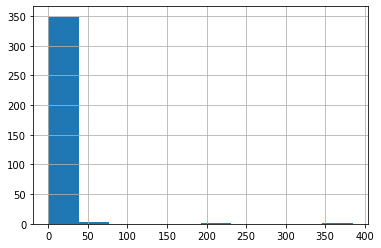

In [205]:
sm.absences.hist()
sm.absences.describe()

Я бы убрала очевидных прогульщиков с 212 и 385 пропусками. Но посмотрим, вдруг у нас что-то еще попадает в выбросы.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


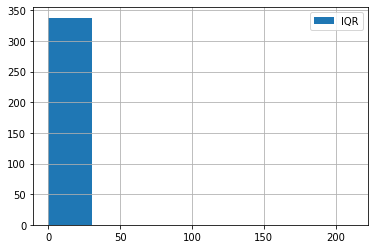

In [206]:
median = sm.absences.median()
IQR = sm.absences.quantile(0.75) - sm.absences.quantile(0.25)
perc25 = sm.absences.quantile(0.25)
perc75 = sm.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
sm.absences.loc[sm.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 7, range = (0, 212), 
                                                                                             label = 'IQR')
plt.legend();

In [207]:
sm = sm.loc[sm.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [209]:
sm.absences = sm.absences.apply(lambda x: None if x == '' else x)

# score

In [208]:
pd.DataFrame(sm.score.value_counts())

,score
50.0,51
55.0,40
0.0,33
65.0,28
60.0,28
75.0,27
70.0,23
40.0,22
45.0,20
80.0,16


Так как наша задача - отследить влияние на успеваемость по математике, то, думаю, строки, где нет результатов экзаменов, нам не нужны и мы можем их удалить.

In [211]:
import numpy as np
sm.score.replace('', np.nan, inplace=True)

In [213]:
sm.dropna(subset=['score'], inplace=True)

In [214]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 394
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  333 non-null    int64  
 1   age                  333 non-null    int64  
 2   address              321 non-null    float64
 3   famsize              313 non-null    float64
 4   Pstatus              296 non-null    float64
 5   Medu                 330 non-null    float64
 6   Fedu                 313 non-null    float64
 7   Mjob                 333 non-null    object 
 8   Fjob                 333 non-null    object 
 9   reason               333 non-null    object 
 10  guardian             305 non-null    object 
 11  traveltime           307 non-null    float64
 12  studytime            328 non-null    float64
 13  failures             314 non-null    float64
 14  schoolsup            324 non-null    float64
 15  famsup               300 non-null    flo

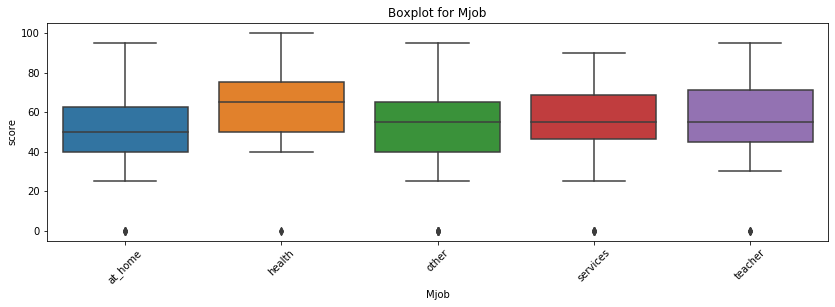

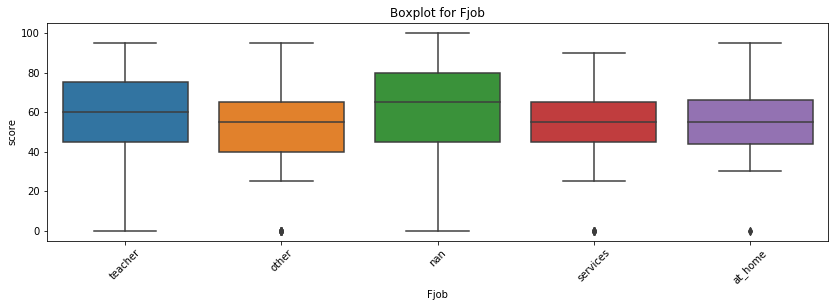

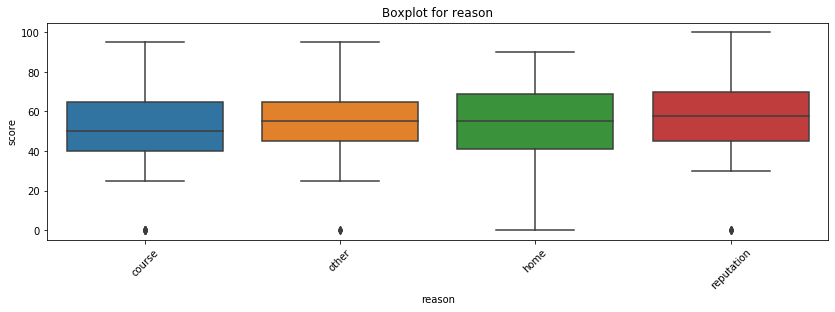

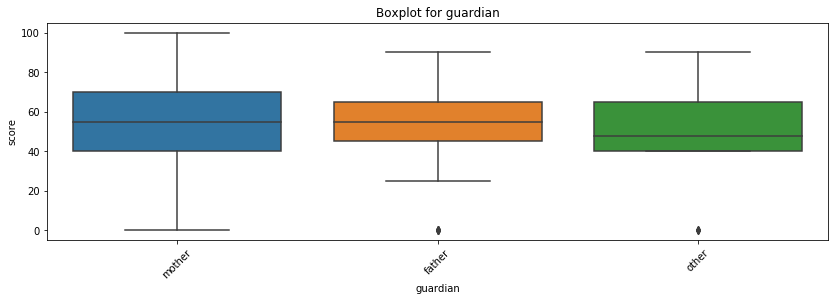

In [215]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=sm.loc[sm.loc[:, column].isin(sm.loc[:, column].value_counts().index[:5])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['Mjob', 'Fjob', 'reason', 'guardian']:
    get_boxplot(col)

In [219]:
def get_stat_dif(column):
    cols = sm.loc[:, column].value_counts().index[:3]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(sm.loc[sm.loc[:, column] == comb[0], 'score'], 
                        sm.loc[sm.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [220]:
for col in ['Mjob', 'Fjob', 'reason', 'guardian']:
    get_stat_dif(col)

Тест Стьюдента не показывает статистической разницы в распределении оценок по этим признакам. Хотя на боксплоте создается ощущение того, что работа матери влияет на оценки. Уберу из анализа определенно лишнюю колонку guardian, попробую почистить строки с пропусками в колонке Mjob и посмотреть еще раз.

In [236]:
sm_clear = sm

In [237]:
sm_clear = sm_clear.drop('guardian', 1) 

In [238]:
sm.Mjob.replace('', np.nan, inplace=True)

In [239]:
sm_clear = sm_clear.loc[sm_clear['Mjob'] != 'nan']

In [241]:
sm_clear.dropna(subset=['Mjob'], inplace=True)

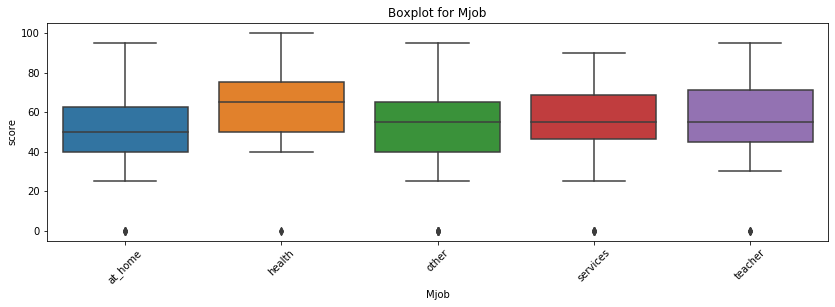

In [253]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=sm_clear.loc[sm_clear.loc[:, column].isin(sm_clear.loc[:, column].value_counts().index[:5])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['Mjob']:
    get_boxplot(col)

In [254]:
def get_stat_dif(column):
    cols = sm_clear.loc[:, column].value_counts().index[:4]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(sm_clear.loc[sm_clear.loc[:, column] == comb[0], 'score'], 
                        sm_clear.loc[sm_clear.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [255]:
for col in ['Mjob', 'Fjob', 'reason']:
    get_stat_dif(col)

Хм, даже после зачистки пустых данных тест не нашел статичтически значимых различий. В принципе, можно удалить колонки с номинативными переменными. Посмотрю корреляцию численных переменных:

In [256]:
sm.corr()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
sex,1.000000,-0.044764,-0.005997,-0.068936,-0.036849,0.066757,-0.039214,0.054283,-0.304679,0.017052,-0.105019,-0.161961,-0.133924,0.118774,-0.012747,0.304679,-0.142672,0.070253,-0.097227,0.033866,0.227828,0.073052,0.141647,0.024852,0.118512
age,-0.044764,1.000000,0.181920,-0.028765,-0.050248,-0.175130,-0.141991,0.068271,0.003584,0.145935,-0.256071,-0.160362,-0.043195,-0.068691,-0.095794,-0.003584,-0.167740,-0.129523,0.095136,0.036100,0.023705,0.082958,-0.071320,0.111178,-0.148309
address,-0.005997,0.181920,1.000000,0.054493,-0.090174,-0.136753,-0.082702,0.269881,0.051926,0.111517,-0.045374,0.005660,-0.026885,0.052639,-0.062006,-0.051926,-0.033075,-0.224252,0.012982,0.012805,-0.062230,-0.107005,0.022158,0.024741,-0.108661
famsize,-0.068936,-0.028765,0.054493,1.000000,-0.069674,0.031572,0.070302,-0.060102,0.087902,0.019558,0.010940,0.142531,0.102186,0.042408,-0.115097,-0.087902,-0.025103,0.005502,-0.037096,0.035101,-0.034295,-0.023778,0.020720,-0.091333,-0.074224
Pstatus,-0.036849,-0.050248,-0.090174,-0.069674,1.000000,0.155370,0.144072,-0.144301,-0.009349,-0.001326,0.082458,0.046703,-0.072898,-0.095055,0.064661,0.009349,0.066892,-0.033917,0.020436,-0.048932,-0.012454,-0.017208,-0.024031,0.129479,0.029020
Medu,0.066757,-0.175130,-0.136753,0.031572,0.155370,1.000000,0.261020,-0.178803,0.086372,-0.231154,0.011234,0.195207,0.110230,0.100777,0.169334,-0.086372,0.173479,0.227122,0.015469,-0.020116,0.037794,0.075548,-0.071175,0.109449,0.206353
Fedu,-0.039214,-0.141991,-0.082702,0.070302,0.144072,0.261020,1.000000,0.030453,0.057864,-0.140307,0.021192,0.134987,-0.024850,0.093048,0.074325,-0.057864,0.085929,0.098830,-0.025202,0.045757,-0.065597,-0.035606,0.015611,-0.005663,0.068887
traveltime,0.054283,0.068271,0.269881,-0.060102,-0.144301,-0.178803,0.030453,1.000000,-0.110515,0.076797,0.007412,0.018087,-0.024025,0.006380,-0.060645,0.110515,-0.114553,-0.065722,0.037268,-0.041983,-0.009083,-0.005917,-0.017069,-0.062414,-0.064353
studytime,-0.304679,0.003584,0.051926,0.087902,-0.009349,0.086372,0.057864,-0.110515,1.000000,-0.154370,0.032761,0.106546,0.213836,0.111049,0.076944,-1.000000,0.145125,0.067160,0.037269,0.023216,-0.140071,-0.053097,-0.108540,-0.067595,0.105548
failures,0.017052,0.145935,0.111517,0.019558,-0.001326,-0.231154,-0.140307,0.076797,-0.154370,1.000000,0.030481,-0.069776,-0.199152,-0.028340,-0.086086,0.154370,-0.221392,-0.104728,0.070389,0.008465,0.103138,0.065346,0.110197,0.021326,-0.323007


Ой, я забыла про колонку . А у нее полная обратная корреляция с колонкой studytime. Посмотрим.

In [258]:
pd.DataFrame(sm['studytime, granular'].value_counts())

,"studytime, granular"
-6.0,161
-3.0,87
-9.0,54
-12.0,26


In [259]:
pd.DataFrame(sm['studytime'].value_counts())

,studytime
2.0,161
1.0,87
3.0,54
4.0,26


А, ну понятно... Можно удалить.

In [260]:
sm = sm.drop('studytime, granular', 1) 

In [261]:
sm.corr()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
sex,1.000000,-0.044764,-0.005997,-0.068936,-0.036849,0.066757,-0.039214,0.054283,-0.304679,0.017052,-0.105019,-0.161961,-0.133924,0.118774,-0.012747,-0.142672,0.070253,-0.097227,0.033866,0.227828,0.073052,0.141647,0.024852,0.118512
age,-0.044764,1.000000,0.181920,-0.028765,-0.050248,-0.175130,-0.141991,0.068271,0.003584,0.145935,-0.256071,-0.160362,-0.043195,-0.068691,-0.095794,-0.167740,-0.129523,0.095136,0.036100,0.023705,0.082958,-0.071320,0.111178,-0.148309
address,-0.005997,0.181920,1.000000,0.054493,-0.090174,-0.136753,-0.082702,0.269881,0.051926,0.111517,-0.045374,0.005660,-0.026885,0.052639,-0.062006,-0.033075,-0.224252,0.012982,0.012805,-0.062230,-0.107005,0.022158,0.024741,-0.108661
famsize,-0.068936,-0.028765,0.054493,1.000000,-0.069674,0.031572,0.070302,-0.060102,0.087902,0.019558,0.010940,0.142531,0.102186,0.042408,-0.115097,-0.025103,0.005502,-0.037096,0.035101,-0.034295,-0.023778,0.020720,-0.091333,-0.074224
Pstatus,-0.036849,-0.050248,-0.090174,-0.069674,1.000000,0.155370,0.144072,-0.144301,-0.009349,-0.001326,0.082458,0.046703,-0.072898,-0.095055,0.064661,0.066892,-0.033917,0.020436,-0.048932,-0.012454,-0.017208,-0.024031,0.129479,0.029020
Medu,0.066757,-0.175130,-0.136753,0.031572,0.155370,1.000000,0.261020,-0.178803,0.086372,-0.231154,0.011234,0.195207,0.110230,0.100777,0.169334,0.173479,0.227122,0.015469,-0.020116,0.037794,0.075548,-0.071175,0.109449,0.206353
Fedu,-0.039214,-0.141991,-0.082702,0.070302,0.144072,0.261020,1.000000,0.030453,0.057864,-0.140307,0.021192,0.134987,-0.024850,0.093048,0.074325,0.085929,0.098830,-0.025202,0.045757,-0.065597,-0.035606,0.015611,-0.005663,0.068887
traveltime,0.054283,0.068271,0.269881,-0.060102,-0.144301,-0.178803,0.030453,1.000000,-0.110515,0.076797,0.007412,0.018087,-0.024025,0.006380,-0.060645,-0.114553,-0.065722,0.037268,-0.041983,-0.009083,-0.005917,-0.017069,-0.062414,-0.064353
studytime,-0.304679,0.003584,0.051926,0.087902,-0.009349,0.086372,0.057864,-0.110515,1.000000,-0.154370,0.032761,0.106546,0.213836,0.111049,0.076944,0.145125,0.067160,0.037269,0.023216,-0.140071,-0.053097,-0.108540,-0.067595,0.105548
failures,0.017052,0.145935,0.111517,0.019558,-0.001326,-0.231154,-0.140307,0.076797,-0.154370,1.000000,0.030481,-0.069776,-0.199152,-0.028340,-0.086086,-0.221392,-0.104728,0.070389,0.008465,0.103138,0.065346,0.110197,0.021326,-0.323007


Честно говоря, не знаю, на каком значении корреляции поставить отсечку и считать, что по эту сторону значения переменные влияют на score, а по эту - уже нет. Так как параметром много, возьму порог значения корреляции плюс/минус 0.1. Предлагаю для построения модели оставить следующие данные:

In [264]:
sm_for_model = sm.loc[:, ['sex', 'age', 'address', 'Medu', 'studytime', 'failures', 'paid', 'higher', 'romantic', 'goout', 'absences', 'score']]
sm_for_model.head()

,sex,age,address,Medu,studytime,failures,paid,higher,romantic,goout,absences,score
0,1,18,1.0,4.0,2.0,0.0,0.0,1.0,0.0,4.0,6.0,30.0
1,1,17,1.0,1.0,2.0,0.0,0.0,1.0,0.0,3.0,4.0,30.0
2,1,15,1.0,1.0,2.0,3.0,NaN,1.0,NaN,2.0,10.0,50.0
3,1,15,1.0,4.0,3.0,0.0,1.0,1.0,1.0,2.0,2.0,75.0
4,1,16,1.0,3.0,2.0,0.0,1.0,1.0,0.0,2.0,4.0,50.0


In [265]:
sm_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 394
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        333 non-null    int64  
 1   age        333 non-null    int64  
 2   address    321 non-null    float64
 3   Medu       330 non-null    float64
 4   studytime  328 non-null    float64
 5   failures   314 non-null    float64
 6   paid       298 non-null    float64
 7   higher     316 non-null    float64
 8   romantic   306 non-null    float64
 9   goout      326 non-null    float64
 10  absences   333 non-null    float64
 11  score      333 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 33.8 KB


В данных остались только численные переменные. 
Ошибок в данных было не так много, но достаточно много пропусков, к сожалению. 
В датасете остались колонки с численными переменными, имеющими корреляцию со score от 0.1 и выше.
Я только в одмоме месте позволила себе заменить пропуски на подходящие (на мой взгляд) другие значения из столбца.
В остальных случаях мне это не показалось допустимым.